#####     Github https://github.com/IsmailTosunTnyl/simpleAIlib/tree/master/HW1


## Main Class

In [5]:
from simpleai.search import SearchProblem, breadth_first, depth_first, uniform_cost, limited_depth_first, iterative_limited_depth_first
from simpleai.search.viewers import WebViewer, ConsoleViewer, BaseViewer
import time


class WaterJug(SearchProblem):
    def __init__(self, initial_state=(0, 0, 0), goal_state=(4, 4, 0), capacity=(8, 5, 3), is_cost_static=True):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.capacity = capacity
        self.is_cost_static = is_cost_static

    def actions(self, state):
        
        # fill
        if state[0] < self.capacity[0]:
            yield('fill 1')
        if state[1] < self.capacity[1]:
            yield('fill 2')
        if state[2] < self.capacity[2]:
            yield('fill 3')
        # empty
        if state[0] > 0:
           yield('empty 1')
        if state[1] > 0:
            yield('empty 2')
        if state[2] > 0:
            yield('empty 3')
        # pour
        if state[0] > 0 and state[1] < self.capacity[1]:
            yield('pour 1 2')
        if state[0] > 0 and state[2] < self.capacity[2]:
            yield('pour 1 3')
        if state[1] > 0 and state[0] < self.capacity[0]:
            yield('pour 2 1')
        if state[1] > 0 and state[2] < self.capacity[2]:
            yield('pour 2 3')
        if state[2] > 0 and state[0] < self.capacity[0]:
            yield('pour 3 1')
        if state[2] > 0 and state[1] < self.capacity[1]:
            yield('pour 3 2')
        

    def result(self, state, action):
        state = list(state)
        action_key = action.split(' ')
        if action_key[0] == 'fill':
            state[int(action_key[1])-1] = self.capacity[int(action_key[1])-1]
        elif action_key[0] == 'empty':
            state[int(action_key[1])-1] = 0
        elif action_key[0] == 'pour':
            amount = min(state[int(
                action_key[1])-1], self.capacity[int(action_key[2])-1]-state[int(action_key[2])-1])
            state[int(action_key[1])-1] -= amount
            state[int(action_key[2])-1] += amount
        return tuple(state)

    def is_goal(self, state):
        return state == self.goal_state

    def cost(self, state, action, state2):
        if self.is_cost_static:
            return 1
        else:
            action_keys = action.split(' ')
            if action_keys[0] == 'fill':
                return self.capacity[int(action_keys[1])-1] - state[int(action_keys[1])-1]
            elif action_keys[0] == 'empty':
                return state[int(action_keys[1])-1]
            elif action_keys[0] == 'pour':
                # return min(state[int(action_keys[1])-1], self.capacity[int(action_keys[2])-1]-state[int(action_keys[2])-1])
                return 1

    def printer(self, statewithaction):
        state = statewithaction[1]
        action = statewithaction[0]
        action = str(action).split(' ')

        if action[0] == 'pour':
            print('Pour from jug {} to jug {}'.format(action[1], action[2]))
            print(state)
        elif action[0] == 'fill':
            print('Fill jug {}'.format(action[1]))
            print(state)
        elif action[0] == 'empty':
            print('Empty jug {}'.format(action[1]))
            print(state)


## Printer Method 

In [6]:
def main_printer(problem, result, capacity, r, header):
    print("\n********", header, "********\n")
    print("Capacities:", capacity)
    for p in result.path():
        problem.printer(p)
    print("Total cost:", result.cost)
    print(r)
    print("\n****************\n")


## Algorithm test function

In [7]:
def algorithm_runner(problem, algorithm, header,depth_limit, graph_search):
    start_time = time.time()

    my_viewer = BaseViewer()
    if algorithm == limited_depth_first:
        result = algorithm(problem, viewer=my_viewer,
                           graph_search=graph_search, depth_limit=depth_limit)
    else:
        result = algorithm(problem, graph_search=graph_search, viewer=my_viewer)

    end_time = time.time()
    time_taken = end_time - start_time

    r = {}
    r['Time'] = time_taken
    r['Cost'] = result.cost
    for k in my_viewer.stats.keys():
        r[k] = my_viewer.stats[k]

    main_printer(problem, result, problem.capacity, r, header)
    return r


## Main function

In [8]:


if __name__ == '__main__':
    initial_state = (0, 0, 0)
    c1 = input("Enter capacity of jug 1: ")
    c2 = input("Enter capacity of jug 2: ")
    c3 = input("Enter capacity of jug 3: ")
    capacity = (int(c1), int(c2), int(c3))
    t1 = input("Enter target amount of water in jug 1: ")
    t2 = input("Enter target amount of water in jug 2: ")
    t3 = input("Enter target amount of water in jug 3: ")
    goal_state = (int(t1), int(t2), int(t3))
    #goal_state = (4, 4, 0)
    #capacity = (8, 5, 3)

    problem = WaterJug(initial_state, goal_state,
                       capacity, is_cost_static=False)

    algorithms = [breadth_first, depth_first, uniform_cost,
                  limited_depth_first, iterative_limited_depth_first]
    headers = ["Breadth First", "Depth First", "Uniform Cost",
               "Limited Depth First", "Iterative Limited Depth First"]


### Collecting results

In [9]:
results = []
for algo in algorithms:
    results.append(algorithm_runner(
        problem, algo, headers[algorithms.index(algo)],depth_limit=11, graph_search=True))



******** Breadth First ********

Capacities: (8, 5, 3)
Fill jug 1
(8, 0, 0)
Pour from jug 1 to jug 2
(3, 5, 0)
Pour from jug 2 to jug 3
(3, 2, 3)
Pour from jug 3 to jug 1
(6, 2, 0)
Pour from jug 2 to jug 3
(6, 0, 2)
Pour from jug 1 to jug 2
(1, 5, 2)
Pour from jug 2 to jug 3
(1, 4, 3)
Pour from jug 3 to jug 1
(4, 4, 0)
Total cost: 15
{'Time': 0.010987520217895508, 'Cost': 15, 'max_fringe_size': 29, 'visited_nodes': 114, 'iterations': 114}

****************


******** Depth First ********

Capacities: (8, 5, 3)
Fill jug 3
(0, 0, 3)
Pour from jug 3 to jug 2
(0, 3, 0)
Fill jug 3
(0, 3, 3)
Pour from jug 3 to jug 2
(0, 5, 1)
Pour from jug 3 to jug 1
(1, 5, 0)
Pour from jug 2 to jug 3
(1, 2, 3)
Pour from jug 3 to jug 1
(4, 2, 0)
Pour from jug 2 to jug 3
(4, 0, 2)
Pour from jug 1 to jug 2
(0, 4, 2)
Pour from jug 3 to jug 1
(2, 4, 0)
Pour from jug 2 to jug 3
(2, 1, 3)
Pour from jug 3 to jug 1
(5, 1, 0)
Empty jug 2
(5, 0, 0)
Fill jug 3
(5, 0, 3)
Pour from jug 3 to jug 2
(5, 3, 0)
Pour from jug

In [10]:
import pandas as pd
from matplotlib.pyplot import title
print("********** Summary **********")
df = pd.DataFrame(results, index=headers)
print(df.head(5))
df


********** Summary **********
                                   Time  Cost  max_fringe_size  visited_nodes  \
Breadth First                  0.010988    15               29            114   
Depth First                    0.001758    27               60             22   
Uniform Cost                   0.015956    15               49            103   
Limited Depth First            0.002839    21               38             45   
Iterative Limited Depth First  0.029914    21               38            570   

                               iterations  
Breadth First                         114  
Depth First                            22  
Uniform Cost                          103  
Limited Depth First                    45  
Iterative Limited Depth First         570  


,Time,Cost,max_fringe_size,visited_nodes,iterations
Breadth First,0.010988,15,29,114,114
Depth First,0.001758,27,60,22,22
Uniform Cost,0.015956,15,49,103,103
Limited Depth First,0.002839,21,38,45,45
Iterative Limited Depth First,0.029914,21,38,570,570


<AxesSubplot: title={'center': 'Time taken by variable cost functions'}>

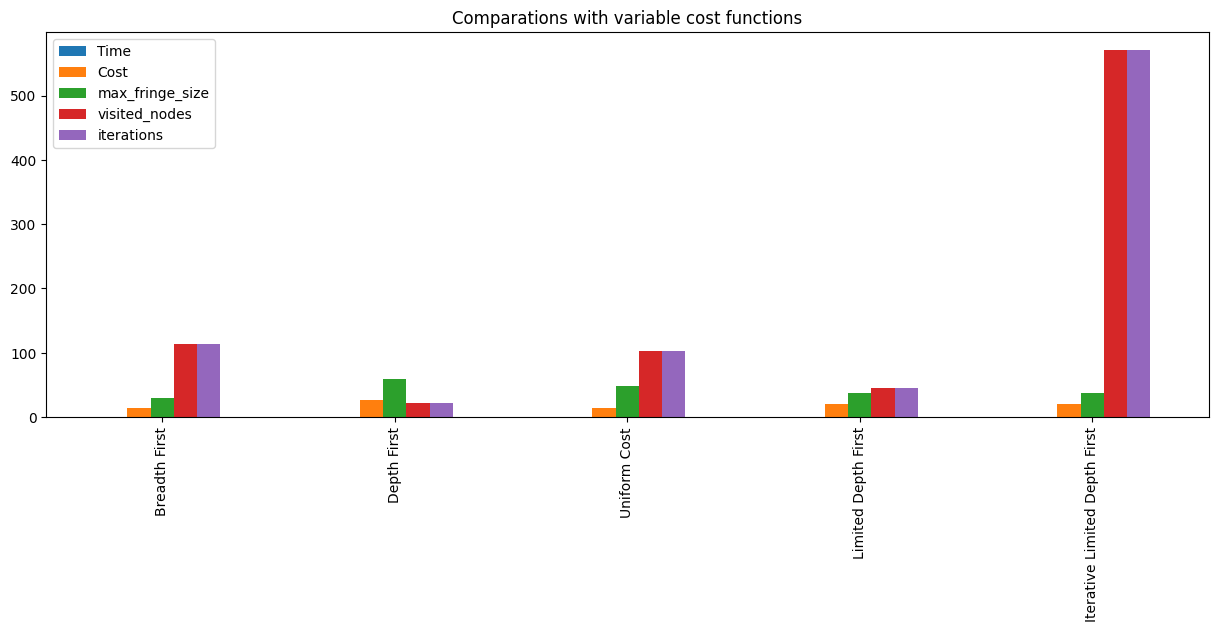

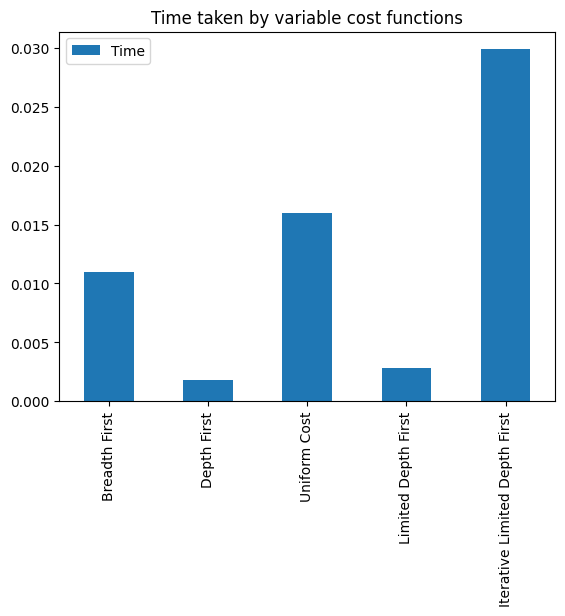

In [11]:
df.plot.bar(figsize=(15, 5), title="Comparations with variable cost functions")
df.plot.bar(y="Time", title="Time taken by variable cost functions")


In [12]:
problem = WaterJug(initial_state, goal_state,
                   capacity, is_cost_static=True)
headers = ["Breadth First", "Depth First", "Uniform Cost_staticCost",
           "Limited Depth First", "Iterative Limited Depth First"]
results = []
for algo in algorithms:
    results.append(algorithm_runner(
        problem, algo, headers[algorithms.index(algo)],depth_limit=11, graph_search=True))

dff = pd.DataFrame(results, index=headers)
print(dff.head(5))
dff



******** Breadth First ********

Capacities: (8, 5, 3)
Fill jug 1
(8, 0, 0)
Pour from jug 1 to jug 2
(3, 5, 0)
Pour from jug 2 to jug 3
(3, 2, 3)
Pour from jug 3 to jug 1
(6, 2, 0)
Pour from jug 2 to jug 3
(6, 0, 2)
Pour from jug 1 to jug 2
(1, 5, 2)
Pour from jug 2 to jug 3
(1, 4, 3)
Pour from jug 3 to jug 1
(4, 4, 0)
Total cost: 8
{'Time': 0.015455007553100586, 'Cost': 8, 'max_fringe_size': 29, 'visited_nodes': 114, 'iterations': 114}

****************


******** Depth First ********

Capacities: (8, 5, 3)
Fill jug 3
(0, 0, 3)
Pour from jug 3 to jug 2
(0, 3, 0)
Fill jug 3
(0, 3, 3)
Pour from jug 3 to jug 2
(0, 5, 1)
Pour from jug 3 to jug 1
(1, 5, 0)
Pour from jug 2 to jug 3
(1, 2, 3)
Pour from jug 3 to jug 1
(4, 2, 0)
Pour from jug 2 to jug 3
(4, 0, 2)
Pour from jug 1 to jug 2
(0, 4, 2)
Pour from jug 3 to jug 1
(2, 4, 0)
Pour from jug 2 to jug 3
(2, 1, 3)
Pour from jug 3 to jug 1
(5, 1, 0)
Empty jug 2
(5, 0, 0)
Fill jug 3
(5, 0, 3)
Pour from jug 3 to jug 2
(5, 3, 0)
Pour from jug 1

,Time,Cost,max_fringe_size,visited_nodes,iterations
Breadth First,0.015455,8,29,114,114
Depth First,0.001812,21,60,22,22
Uniform Cost_staticCost,0.014614,8,32,133,133
Limited Depth First,0.002816,11,38,45,45
Iterative Limited Depth First,0.026166,11,38,570,570


<AxesSubplot: title={'center': 'Time taken by static functions'}>

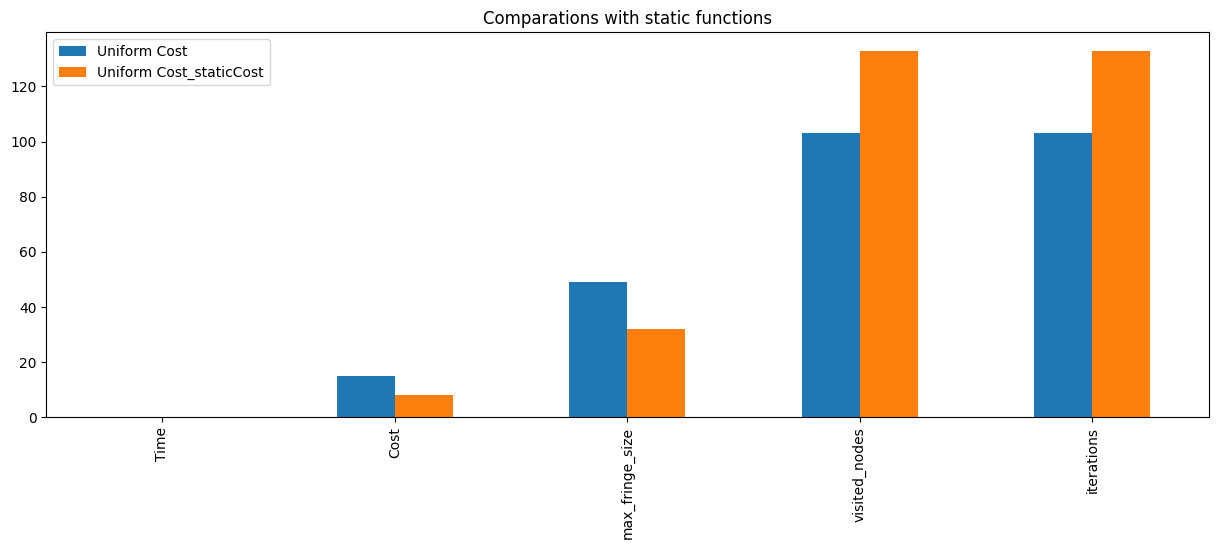

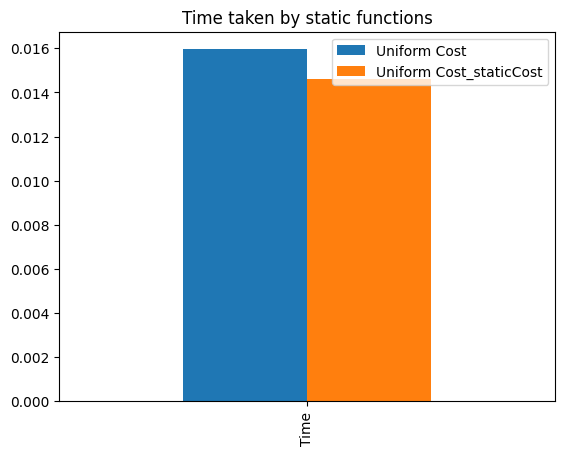

In [13]:
import matplotlib.pyplot as plt
res = pd.concat([df.iloc[2], dff.iloc[2]], axis=1)
res.plot.bar(figsize=(15, 5),
             title="Comparations with static functions")
res.iloc[0:1].plot.bar(title="Time taken by static functions")


## Graph search False
### without graph search running all algrithms takes too much time also sometimes crash

In [14]:
problem = WaterJug(initial_state, goal_state,
                   capacity, is_cost_static=False)
headers = ["Breadth First", "Depth First", "Uniform Cost_staticCost",
           "Limited Depth First", "Iterative Limited Depth First"]
results = []
for algo in algorithms:
    results.append(algorithm_runner(problem, algo, headers[algorithms.index(algo)],depth_limit=11, graph_search=False))

KeyboardInterrupt: 